In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=043c899fede7b04664b8b7fe62df5c86787d7a8874e0bdcf65349687f6912f3a
  Stored in directory: c:\users\francesco\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107
1,0,53.0,1,446,0,60,1,263358.03,1.00,139,1,0,215
2,0,50.0,1,121,1,40,0,260000.00,0.70,130,1,0,175
3,0,63.0,1,1767,0,45,0,73000.00,0.70,137,1,0,186
4,0,50.0,1,167,1,45,0,362000.00,1.00,136,0,0,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0,65.0,0,326,0,38,0,294000.00,1.70,139,0,0,220
175,1,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20
176,0,60.0,1,95,0,60,0,337000.00,1.00,138,1,1,146
177,1,50.0,1,168,0,38,1,276000.00,1.10,137,1,0,11


In [4]:
#uso il metodo .info() per controllare l'eventuale presenza di campi vuoti
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEATH_EVENT               179 non-null    int64  
 1   age                       179 non-null    float64
 2   anaemia                   179 non-null    int64  
 3   creatinine_phosphokinase  179 non-null    int64  
 4   diabetes                  179 non-null    int64  
 5   ejection_fraction         179 non-null    int64  
 6   high_blood_pressure       179 non-null    int64  
 7   platelets                 179 non-null    float64
 8   serum_creatinine          179 non-null    float64
 9   serum_sodium              179 non-null    int64  
 10  sex                       179 non-null    int64  
 11  smoking                   179 non-null    int64  
 12  time                      179 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 18.3 KB


In [5]:
#numero di valori nulli per feature
df_train.isnull().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [6]:
#controllo l'eventuale presenza di duplicati
df_train.duplicated().any()

False

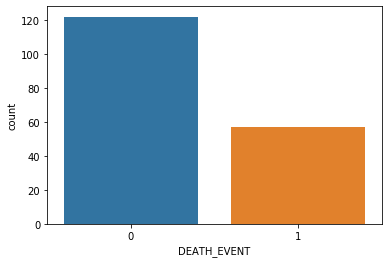

In [7]:
#mostro la distribuzione della variabile di target, un terzo circa delle persone presenti nei dati di train sono decedute
sns.countplot(df_train['DEATH_EVENT'],data=df_train)

Text(0.5, 1.0, 'Fasce di Età rispetto ai Decessi')

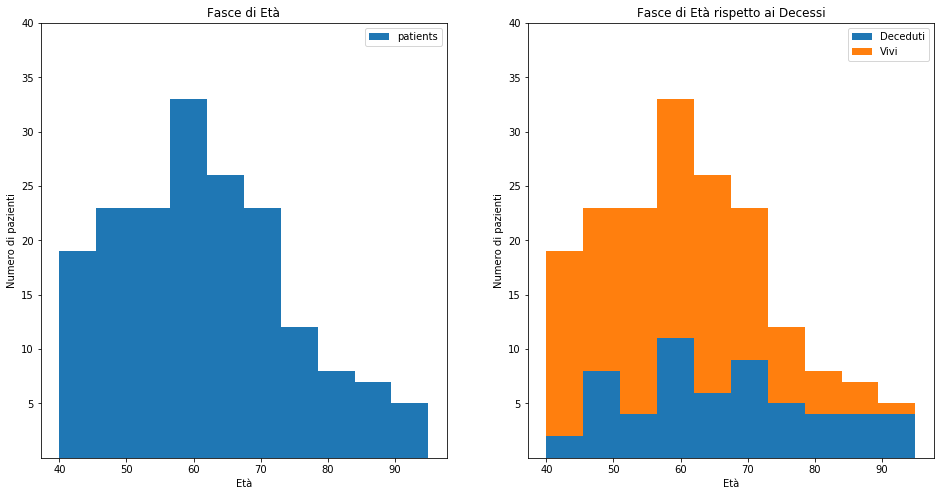

In [8]:
#Analisi delle fasce di età
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df_train['age'],label='patients')
ax[0].set_xlabel('Età')
ax[0].set_ylabel('Numero di pazienti')
ax[0].set_yticks([5,10,15,20,25,30,35,40])
ax[0].legend()
ax[0].set_title('Fasce di Età')
ax[1].hist(x=[df_train[df_train['DEATH_EVENT']==1]['age'],df_train[df_train['DEATH_EVENT']==0]['age']],stacked=True,label=['Deceduti','Vivi'])
ax[1].set_xlabel('Età')
ax[1].set_ylabel('Numero di pazienti')
ax[1].set_yticks([5,10,15,20,25,30,35,40])
ax[1].legend()
ax[1].set_title('Fasce di Età rispetto ai Decessi')

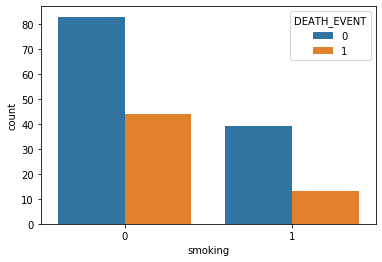

In [9]:
#analizzo il rapporto fra decessi e fumatori
sns.countplot(x=df_train['smoking'], hue=df_train['DEATH_EVENT'])

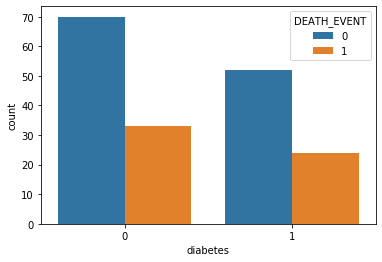

In [10]:
#analizzo il rapporto tra decessi e pazienti con diabete
sns.countplot(x=df_train['diabetes'], hue=df_train['DEATH_EVENT'])

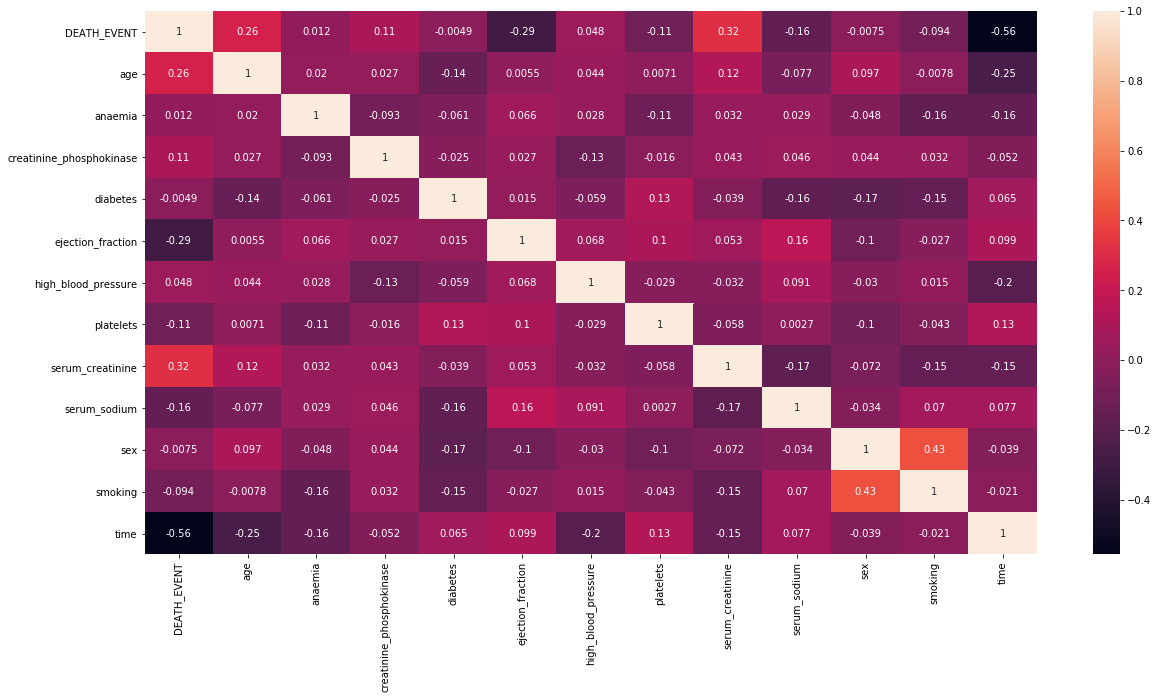

In [11]:
#Creo la matrice di correlazione per analizzare la correlazione tra le features
#non ci sono correlazioni significative
figure = plt.figure(figsize=(20,10))
corr = sns.heatmap(df_train.corr(method='pearson'), annot=True)
plt.show()

In [12]:
y_train = pd.DataFrame(df_train['DEATH_EVENT'])
y_test = pd.DataFrame(df_test['DEATH_EVENT'])

#elimino la colonna target
columns_to_be_deleted = ['DEATH_EVENT']

df_train.drop(columns_to_be_deleted, axis=1, inplace=True)
df_test.drop(columns_to_be_deleted, axis=1, inplace=True)
df_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107
1,53.0,1,446,0,60,1,263358.03,1.00,139,1,0,215
2,50.0,1,121,1,40,0,260000.00,0.70,130,1,0,175
3,63.0,1,1767,0,45,0,73000.00,0.70,137,1,0,186
4,50.0,1,167,1,45,0,362000.00,1.00,136,0,0,187
...,...,...,...,...,...,...,...,...,...,...,...,...
174,65.0,0,326,0,38,0,294000.00,1.70,139,0,0,220
175,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20
176,60.0,1,95,0,60,0,337000.00,1.00,138,1,1,146
177,50.0,1,168,0,38,1,276000.00,1.10,137,1,0,11


In [13]:
#uso lo scaler per scalare la feature:
#'platelets','creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium'
#tra 0 e 100

scaler = MinMaxScaler(feature_range=(0,100))
columns_to_scale= ['platelets','creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium']
scaler.fit(df_train[columns_to_scale])
df_train[columns_to_scale] = scaler.transform(df_train[columns_to_scale])
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

In [14]:
#uso il RandomForestClassifier come modello
model = RandomForestClassifier()

#eseguo il fit del modello
model.fit(df_train, y_train.values.ravel())

#faccio predizioni su dati di train e test
p_train = model.predict(df_train)
p_test = model.predict(df_test)

#uso accuracy score per confrontare i dati di train e test
acc_train = accuracy_score(y_train, p_train)
acc_test = accuracy_score(y_test, p_test)

print(f'Train {acc_train}, Test {acc_test}')

Train 1.0, Test 0.9166666666666666


In [15]:
#uso la Logistic Regression come modello
classifier = LogisticRegression(max_iter=1000)

#eseguo il fit del modello
classifier.fit(df_train, y_train.values.ravel())

#faccio predizioni su dati di train e test
p_train_lr = classifier.predict(df_train)
p_test_lr = classifier.predict(df_test)

#uso accuracy score per confrontare i dati di train e test
acc_train_lr = accuracy_score(y_train, p_train_lr)
acc_test_lr = accuracy_score(y_test, p_test_lr)

print(f'Train {acc_train_lr}, Test {acc_test_lr}')

Train 0.8491620111731844, Test 0.85


In [16]:
#uso la Grid Search per fare tuning dei parametri sulla Random Forest
parameters = {
    'n_estimators': [100,200],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_depth': [5,6,7],
    'min_samples_leaf': [5,10,20],
}
scoring = ['accuracy']
grid_search = GridSearchCV(param_grid = parameters,
                          cv = StratifiedKFold(10),
                          estimator = RandomForestClassifier(criterion='gini'),
                          verbose = 1,
                          scoring = scoring,
                          refit = 'accuracy')
grid_search.fit(df_train, y_train.values.ravel())

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  3.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                        

In [17]:
#Calcolo accuracy per il modello addestrato nel passo precedente
prediction_train = grid_search.best_estimator_.predict(df_train)
prediction_test = grid_search.best_estimator_.predict(df_test)
acc_train_grid = accuracy_score(y_train, prediction_train)
acc_test_grid = accuracy_score(y_test, prediction_test)

print(f'Train {acc_train_grid}, Test {acc_test_grid}')

Train 0.888268156424581, Test 0.9
